# Deep Neural Network for News Classification: Application

You will use use the functions you'd implemented in the previous assignment to build a deep network, and apply it to politics-society news classification. Hopefully, you will see an improvement in accuracy relative to your previous logistic regression implementation.  

**After this assignment you will be able to:**
- Build and apply a deep neural network to supervised learning. 

Let's get started!

## 1 - Packages

Let's first import all the packages that you will need during this assignment. 
- dnn_app_utils provides the functions implemented in the "Building your Deep Neural Network: Step by Step" assignment to this notebook.

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import model_selection, preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from dnn_app_utils_v2 import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

## 2 - Dataset

You will use the same dataset as in "Logistic Regression as a Neural Network". The model you had built had 84% test accuracy on classifying politics-society vs others news. Hopefully, your new model will perform a better!

In [2]:
df = pd.read_csv('news_dataset.csv')

In [3]:
df.head()

,text,label
0,Nhân tài… đến rồi đi Trong cuộc khảo sát nhan...,Chinhtrixahoi
1,Tử hình Lâm Bích Thủy và Toàn '6 Ngón' \n Hôm...,Khac
2,"Dùng ống chích tống tiền 1 tỉ đồng Tối 19-12,...",Khac
3,Mekong Capital tăng đầu tư vào VN \n Ông Chris...,Khac
4,Tàu hoả húc xe tải gây ách tắc hơn 9 giờ \n Đo...,Chinhtrixahoi


In [4]:
size_politics_society = df[df['label'] == 'Chinhtrixahoi'].shape[0]
size_others = df[df['label'] == 'Khac'].shape[0]
print('Number of politics-society documents: %s' %size_politics_society)
print('Number of other documents: %s' %size_others)

Number of politics-society documents: 200
Number of other documents: 200


In [5]:
# an example of a politics-society news
df['text'][4]

"Tàu hoả húc xe tải gây ách tắc hơn 9 giờ \n Đoàn tàu D2 từ Sài Gòn ra Đà Nẵng đã húc phải một xe tải Kamaz tại Km 1264 trên đường sắt thuộc huyện Vạn Ninh, tỉnh Khánh Hòa. Xe tải hư hại nặng, đầu máy xe lửa trật đường ray. Tai nạn xảy ra vào 22h30' ngày 1/7 khiến nhiều đoàn tàu bị đình trệ. \n Đến 7h30 ngày 2/7, giao thông trên đường sắt xuyên Việt mới trở lại bình thường. \n Theo ông Nguyễn Đình Tân, Giám đốc Xí nghiệp vận tải đường sắt Phú Khánh, nguyên nhân tai nạn do xe tải chở vật liệu nặng băng qua đường sắt nhưng không vượt qua được và nằm chắn ngang trên đường ray. Tài xế xe tải đã bỏ trốn. \n Tại ga Đà Nẵng, lúc 10h ngày 2/7 nhà ga mới thông báo về sự kiện này khiến hơn 500 hành khách đi trên 7 chuyến tàu E, S đã mua vé từ Đà Nẵng đi ra phía bắc rất bực mình vì phải đợi tàu nhiều giờ, nhất là hàng trăm thí sinh cùng người nhà đi thi đại học tại Vinh và Hà Nội. \n  \n "

In [6]:
# split the dataset into training and test datasets 
train_x, test_x, train_y, test_y = model_selection.train_test_split(df['text'], df['label'])

# label encode the target variable, encode labels to 0 or 1
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
test_y = encoder.fit_transform(test_y)
print('["Chinhtrixahoi" "Khac"] labels corresponds to %s labels' %encoder.transform(["Chinhtrixahoi", "Khac"]))

["Chinhtrixahoi" "Khac"] labels corresponds to [0 1] labels


#### TF-IDF Vectors as features

In [7]:
# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(df['text'])
xtrain_tfidf =  tfidf_vect.transform(train_x)
xtest_tfidf =  tfidf_vect.transform(test_x)

In [8]:
# Getting transformed training and testing dataset
print('Number of training documents: %s' %str(xtrain_tfidf.shape[0]))
print('Number of testing documents: %s' %str(xtest_tfidf.shape[0]))
print('Number of features of each document: %s' %str(xtrain_tfidf.shape[1]))
print('xtrain_tfidf shape: %s' %str(xtrain_tfidf.shape))
print('train_y shape: %s' %str(train_y.shape))
print('xtest_tfidf shape: %s' %str(xtest_tfidf.shape))
print('test_y shape: %s' %str(test_y.shape))

Number of training documents: 300
Number of testing documents: 100
Number of features of each document: 5000
xtrain_tfidf shape: (300, 5000)
train_y shape: (300,)
xtest_tfidf shape: (100, 5000)
test_y shape: (100,)


In [9]:
# To have matrix/vector dimensions that fit out networks
# you should now transpose the training and testing numpy-array, 
# and expand the shape of the lable arrays in the axis=0 position.train_y = np.expand_dims(train_y, axis=0)
train_y = np.expand_dims(train_y, axis=0)
test_y = np.expand_dims(test_y, axis=0)

# for convenience in this exercise, we also use toarray() to convert sparse to dense matrix 
xtrain_tfidf =  xtrain_tfidf.T.toarray() 
xtest_tfidf =  xtest_tfidf.T.toarray()
### END CODE HERE ###

In [10]:
# New shape 
print('xtrain_tfidf shape: %s' %str(xtrain_tfidf.shape))
print('train_y shape: %s' %str(train_y.shape))
print('xtest_tfidf shape: %s' %str(xtest_tfidf.shape))
print('test_y shape: %s' %str(test_y.shape))

xtrain_tfidf shape: (5000, 300)
train_y shape: (1, 300)
xtest_tfidf shape: (5000, 100)
test_y shape: (1, 100)


## 3 - Architecture of your model

Now that you are familiar with the dataset, it is time to build a deep neural network to distinguish politics-society news from other news.

You will build two different models:
- A 2-layer neural network
- An L-layer deep neural network

You will then compare the performance of these models, and also try out different values for $L$. 

Let's look at the two architectures.

### 3.1 - 2-layer neural network
#### An analogy between images and news classifcation

<img src="images/2layerNN_kiank.png" style="width:650px;height:400px;">
<caption><center> <u>Figure 2</u>: 2-layer neural network. <br> The model can be summarized as: ***INPUT -> LINEAR -> RELU -> LINEAR -> SIGMOID -> OUTPUT***. </center></caption>

<u>Detailed Architecture of figure 2</u>:
- The input is a (64,64,3) image which is flattened to a vector of size $(12288,1)$. 
- The corresponding vector: $[x_0,x_1,...,x_{12287}]^T$ is then multiplied by the weight matrix $W^{[1]}$ of size $(n^{[1]}, 12288)$.
- You then add a bias term and take its relu to get the following vector: $[a_0^{[1]}, a_1^{[1]},..., a_{n^{[1]}-1}^{[1]}]^T$.
- You then repeat the same process.
- You multiply the resulting vector by $W^{[2]}$ and add your intercept (bias). 
- Finally, you take the sigmoid of the result. If it is greater than 0.5, you classify it to be a cat.

### 3.2 - L-layer deep neural network
#### An analogy between images and news classifcation

It is hard to represent an L-layer deep neural network with the above representation. However, here is a simplified network representation:

<img src="images/LlayerNN_kiank.png" style="width:650px;height:400px;">
<caption><center> <u>Figure 3</u>: L-layer neural network. <br> The model can be summarized as: ***[LINEAR -> RELU] $\times$ (L-1) -> LINEAR -> SIGMOID***</center></caption>

<u>Detailed Architecture of figure 3</u>:
- The input is a (64,64,3) image which is flattened to a vector of size (12288,1).
- The corresponding vector: $[x_0,x_1,...,x_{12287}]^T$ is then multiplied by the weight matrix $W^{[1]}$ and then you add the intercept $b^{[1]}$. The result is called the linear unit.
- Next, you take the relu of the linear unit. This process could be repeated several times for each $(W^{[l]}, b^{[l]})$ depending on the model architecture.
- Finally, you take the sigmoid of the final linear unit. If it is greater than 0.5, you classify it to be a cat.

### 3.3 - General methodology

As usual you will follow the Deep Learning methodology to build the model:
    1. Initialize parameters / Define hyperparameters
    2. Loop for num_iterations:
        a. Forward propagation
        b. Compute cost function
        c. Backward propagation
        d. Update parameters (using parameters, and grads from backprop) 
    4. Use trained parameters to predict labels

Let's now implement those two models!

## 4 - Two-layer neural network

**Question**:  Use the helper functions you have implemented in the previous assignment to build a 2-layer neural network with the following structure: *LINEAR -> RELU -> LINEAR -> SIGMOID*. The functions you may need and their inputs are:
```python
def initialize_parameters(n_x, n_h, n_y):
    ...
    return parameters 
def linear_activation_forward(A_prev, W, b, activation):
    ...
    return A, cache
def compute_cost(AL, Y):
    ...
    return cost
def linear_activation_backward(dA, cache, activation):
    ...
    return dA_prev, dW, db
def update_parameters(parameters, grads, learning_rate):
    ...
    return parameters
```

In [11]:
### CONSTANTS DEFINING THE MODEL ####
n_x = 5000
n_h = 7
n_y = 1
layers_dims = (n_x, n_h, n_y)

In [12]:
# GRADED FUNCTION: two_layer_model

def two_layer_model(X, Y, layers_dims, learning_rate = 0.1, num_iterations = 2000, print_cost=False):
    """
    Implements a two-layer neural network: LINEAR->RELU->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (n_x, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- dimensions of the layers (n_x, n_h, n_y)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- If set to True, this will print the cost every 100 iterations 
    
    Returns:
    parameters -- a dictionary containing W1, W2, b1, and b2
    """
    
    np.random.seed(1)
    grads = {}
    costs = []                              # to keep track of the cost
    m = X.shape[1]                           # number of examples
    (n_x, n_h, n_y) = layers_dims
    
    # Initialize parameters dictionary, by calling one of the functions you'd previously implemented
    ### START CODE HERE ### (≈ 1 line of code)
    parameters = initialize_parameters(n_x, n_h, n_y)
    ### END CODE HERE ###
    
    # Get W1, b1, W2 and b2 from the dictionary parameters.
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> SIGMOID. Inputs: "X, W1, b1, W2, b2". Output: "A1, cache1, A2, cache2".
        ### START CODE HERE ### (≈ 2 lines of code)
        A1, cache1 = linear_activation_forward(X,W1,b1,activation='relu')
        A2, cache2 = linear_activation_forward(A1,W2,b2,activation='sigmoid')
        ### END CODE HERE ###
        
        # Compute cost
        ### START CODE HERE ### (≈ 1 line of code)
        cost = compute_cost(A2,Y)
        ### END CODE HERE ###
        
        # Initializing backward propagation
        dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))
        
        # Backward propagation. Inputs: "dA2, cache2, cache1". Outputs: "dA1, dW2, db2; also dA0 (not used), dW1, db1".
        ### START CODE HERE ### (≈ 2 lines of code)
        dA1, dW2, db2 = linear_activation_backward(dA2, cache2,activation='sigmoid')
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1,activation='relu') 
        ### END CODE HERE ###
        
        # Set grads['dWl'] to dW1, grads['db1'] to db1, grads['dW2'] to dW2, grads['db2'] to db2
        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2
        
        # Update parameters.
        ### START CODE HERE ### (approx. 1 line of code)
        parameters = update_parameters(parameters,grads,learning_rate)
        ### END CODE HERE ###

        # Retrieve W1, b1, W2, b2 from parameters
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if print_cost and i % 100 == 0:
            costs.append(cost)
       
    # plot the cost

    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Run the cell below to train your parameters. See if your model runs. The cost should be decreasing.

Cost after iteration 0: 0.6931475379427394
Cost after iteration 100: 0.6931321574776348
Cost after iteration 200: 0.6931064067560664
Cost after iteration 300: 0.6930518851628301
Cost after iteration 400: 0.692926173072435
Cost after iteration 500: 0.6926336626751213
Cost after iteration 600: 0.6919475739568351
Cost after iteration 700: 0.6903564593439382
Cost after iteration 800: 0.6866952341352913
Cost after iteration 900: 0.6784391061234374
Cost after iteration 1000: 0.6605496356627871
Cost after iteration 1100: 0.6248107303348885
Cost after iteration 1200: 0.5627344398361673
Cost after iteration 1300: 0.47473821377770264
Cost after iteration 1400: 0.376838128025999
Cost after iteration 1500: 0.28860380548451836
Cost after iteration 1600: 0.2189201279759746
Cost after iteration 1700: 0.167212894583082
Cost after iteration 1800: 0.1296663607934322
Cost after iteration 1900: 0.10240758573940034
Cost after iteration 2000: 0.08243792619729824
Cost after iteration 2100: 0.0676054938239877

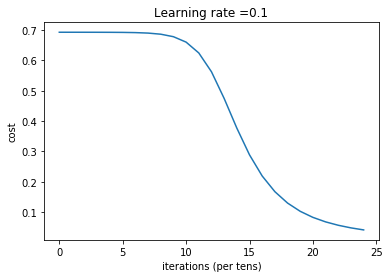

In [13]:
parameters = two_layer_model(xtrain_tfidf, train_y, layers_dims = (n_x, n_h, n_y), num_iterations = 2500, print_cost=True)

Good thing you built a vectorized implementation! Otherwise it might have taken 10 times longer to train this.

Now, you can use the trained parameters to classify news from the dataset. To see your predictions on the training and test sets, run the cell below.

In [14]:
predictions_train = predict(xtrain_tfidf, train_y, parameters)

Accuracy: 1.0000000000000002


In [15]:
predictions_test = predict(xtest_tfidf, test_y, parameters)

Accuracy: 0.8699999999999999


**Note**: Running the model on fewer iterations may gives better accuracy on the test set. This is called "early stopping" and we will talk about it in the next course. Early stopping is a way to prevent overfitting. 

Congratulations! It seems that your 2-layer neural network has better performance than the logistic regression implementation. Let's see if you can do even better with an $L$-layer model.

## 5 - L-layer Neural Network

**Question**: Use the helper functions you have implemented previously to build an $L$-layer neural network with the following structure: *[LINEAR -> RELU]$\times$(L-1) -> LINEAR -> SIGMOID*. The functions you may need and their inputs are:
```python
def initialize_parameters_deep(layers_dims):
    ...
    return parameters 
def L_model_forward(X, parameters):
    ...
    return AL, caches
def compute_cost(AL, Y):
    ...
    return cost
def L_model_backward(AL, Y, caches):
    ...
    return grads
def update_parameters(parameters, grads, learning_rate):
    ...
    return parameters
```

In [16]:
### CONSTANTS ###
layers_dims = [5000, 20, 7, 5, 1] #  4-layer model

In [17]:
# GRADED FUNCTION: L_layer_model

def L_layer_model(X, Y, layers_dims, learning_rate = 0.1, num_iterations = 2000, print_cost=False):#lr was 0.009
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (number of examples, num_px * num_px * 3)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)
    costs = []                         # keep track of cost
    
    # Parameters initialization. (≈ 1 line of code)
    ### START CODE HERE ###
    parameters = initialize_parameters_deep(layers_dims)
    ### END CODE HERE ###
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        ### START CODE HERE ### (≈ 1 line of code)
        AL, caches = L_model_forward(X,parameters)
        ### END CODE HERE ###
        
        # Compute cost.
        ### START CODE HERE ### (≈ 1 line of code)
        cost = compute_cost(AL,Y)
        ### END CODE HERE ###
    
        # Backward propagation.
        ### START CODE HERE ### (≈ 1 line of code)
        grads = L_model_backward(AL,Y,caches)
        ### END CODE HERE ###
 
        # Update parameters.
        ### START CODE HERE ### (≈ 1 line of code)
        parameters = update_parameters(parameters,grads,learning_rate)
        ### END CODE HERE ###
                
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

You will now train the model as a 4-layer neural network. 

Run the cell below to train your model. The cost should decrease on every iteration.

Cost after iteration 0: 0.692959
Cost after iteration 100: 0.680836
Cost after iteration 200: 0.627360
Cost after iteration 300: 0.429158
Cost after iteration 400: 0.044286


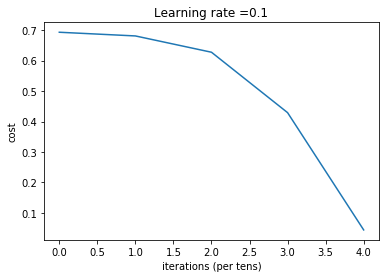

In [18]:
parameters = L_layer_model(xtrain_tfidf, train_y, layers_dims, num_iterations = 500, print_cost = True)

In [19]:
pred_train = predict(xtrain_tfidf, train_y, parameters)

Accuracy: 1.0000000000000002


In [20]:
pred_test = predict(xtest_tfidf, test_y, parameters)

Accuracy: 0.8799999999999999


It seems that your 4-layer neural network has slightly better performance (88%) than 2-layer neural network (87%) on the same test set. The 4-layer network also needs much less iterations to converge.

This is good performance for this task. Nice job! 

Though in the next course on "Improving deep neural networks" you will learn how to obtain even higher accuracy by systematically searching for better hyperparameters (learning_rate, layers_dims, num_iterations, and others you'll also learn in the next course). 

##  6) Results Analysis

First, let's take a look at some news the L-layer model labeled incorrectly. This will show a few mislabeled news. 

In [21]:
a = pred_test + test_y
mislabeled_indices = np.asarray(np.where(a == 1))

In [22]:
import re
num_news = len(mislabeled_indices[0])
for i in range(num_news):
    index = mislabeled_indices[1][i]
    true = test_y[0][index]
    pred = pred_test[0][index]
    print('This is "%s" news, you predicted it is "%s" news: \n' %(encoder.inverse_transform(true), encoder.inverse_transform(int(pred))))
    print(re.sub(r'\s{2,}', "", list(test_x[index:index+1])[0]))
    print('------------------------------------------------------------')

This is "Khac" news, you predicted it is "Chinhtrixahoi" news: 

67 hãng lữ hành nhận giải thưởng The Guide AwardsGiải thưởng The Guide Awards 2003 dành cho các doanh nghiệp dịch vụ du lịch tại Việt Nam sẽ được diễn ra vào tối 26/3 tại Dinh Thống Nhất (TP HCM). Đây là lần thứ 5 giải được tổ chức có số lượng doanh nghiệp đoạt giải cao nhất.Điểm nhấn của giải thưởng năm nay là bảo vệ môi trường với hai giải dành cho Furama Resort và Victoria Châu Đốc.Như mọi năm, nhóm khách sạn vẫn có nhiều giải thưởng nhất với 15 khách sạn đoạt giải. Japan Airlines, Cathay Pacific Airways và Thai Airways nhận được giải mới giành cho hãng hàng không có dịch vụ tốt nhất, dịch vụ hoàn hảo và có giá cạnh tranh nhất. Hai hãng taxi Hà Nội và TP HCM năm nay cũng được bình chọn là hãng taxi tốt nhất.Trong ngày trao giải, hội xuân chào mừng và cổ vũ cho ngành du lịch Việt Nam dự kiến sẽ thu hút khoảng 10.000 lượt công chúng tham dự. Có gần 60 gian hàng của các doanh nghiệp du lịch được triển lãm cùng với các cuộ

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

## 7) Test with your own news (optional/ungraded exercise) ##

Congratulations on finishing this assignment. You can use your own news and see the output of your model.

["Chinhtrixahoi" "Khac"] labels corresponds to [0 1] labels

In [23]:
my_text = u"""Làm mẹ khi quá trẻ dễ bị loãng xương
Những cô gái mới lớn mang thai sẽ gia tăng nguy cơ xương bị yếu đi. Trong một nghiên cứu mới tại Mỹ, 1/3 số bà mẹ ở tuổi thiếu niên có chỉ số điển hình của bệnh loãng xương, hoặc có dấu hiệu báo trước căn bệnh này.
"Cần phải đảm bảo rằng những bà mẹ thiếu niên tiêu thụ đủ lượng canxi trong thời gian mang thai - 1.300 milligram mỗi ngày, để đáp ứng nhu cầu canxi của cả mẹ lẫn bào thai", Kimberly O. O'Brien tại Trường sức khoẻ cộng đồng Johns Hopkins Bloomberg ở Baltimore, phát biểu.
Canxi đặc biệt cần thiết trong thời kỳ mang thai do bào thai khi lớn lên cần nhiều chất dinh dưỡng để hình thành xương, trong lúc bản thân các thiếu nữ cũng cần nhiều canxi cho chính mình. Thực tế, 40% lượng xương của con gái được hình thành trong độ tuổi dậy thì.
Mặc dù có hơn nửa triệu thiếu nữ sinh con tại Mỹ mỗi năm, chưa có nhiều thông tin về việc mang thai ảnh hưởng thế nào tới xương của người mẹ. O'Brien và cộng sự đã nghiên cứu 23 cô gái mang thai trong độ tuổi 13,5 đến 18,3. Cũng giống như người lớn, lượng tiêu thụ canxi trong thời kỳ mang thai của các cô gái trẻ cao hơn là sau khi sinh.
Khoảng 1/3 các bà mẹ trẻ có dấu hiệu xương mỏng đi đáng kể sau khi sinh. Trong số 15 em được đo xương trong 3-4 tháng sau khi sinh, 2 em có đủ dấu hiệu của bệnh loãng xương. 3 em khác có dấu hiệu của tiền loãng xương.
Tuy vậy, không phải cứ mang thai ở độ tuổi thiếu niên là có xương bị yếu đi. Kết quả nghiên cứu chỉ ra rằng tiêu thụ nhiều lượng canxi hơn trong thời kỳ mang thai sẽ giúp chống lại tình trạng yếu xương.
"""

my_x_tfidf =  tfidf_vect.transform([my_text]).T.toarray()

In [24]:
my_label_y = [1] # the true class of your news
my_predicted_news = predict(my_x_tfidf, my_label_y, parameters)
print ('your L-layer model predicts "%s" ' %encoder.inverse_transform(int(np.squeeze(my_predicted_news))))

Accuracy: 1.0
your L-layer model predicts "Khac" 


/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


**References**:

- for auto-reloading external module: http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython

## Word Embeddings

In [25]:
from pyvi import ViTokenizer
from gensim.models.word2vec import Word2Vec
from keras.preprocessing import sequence

Using TensorFlow backend.


A word embedding is a form of representing words and documents using a dense vector representation. The position of a word within the vector space is learned from text and is based on the words that surround the word when it is used. Word embeddings can be trained using the input corpus itself or can be generated using pre-trained word embeddings such as Glove, FastText, and Word2Vec. Any one of them can be downloaded and used as transfer learning.

Loading a pretrained word embeddings - based on Vietnam wikipedia.

The word embeddings are trained with gensim - a library for training Word2Vec.

In [26]:
word_vectors = Word2Vec.load('vi.bin').wv

We will see that this also adapt to Vietnamese language since tokenization applied to phrases rather single words.

Show some similar words based on cosine similarity

In [27]:
word_vectors.most_similar('tin_tức')

/usr/local/lib/python3.5/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('thông_tin', 0.6357954144477844),
 ('phóng_viên', 0.6156644821166992),
 ('báo_cáo', 0.6109340786933899),
 ('bình_luận', 0.6045681238174438),
 ('báo_chí', 0.6012976169586182),
 ('biên_tập_viên', 0.5868688821792603),
 ('thời_sự', 0.5609147548675537),
 ('trực_tuyến', 0.5557072162628174),
 ('phóng_sự', 0.5530217885971069),
 ('diễn_đàn', 0.543127179145813)]

In [28]:
word_vectors.most_similar('chính_trị')

/usr/local/lib/python3.5/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('dân_sự', 0.6620455980300903),
 ('quân_sự', 0.6434805989265442),
 ('cấp_tiến', 0.6368024945259094),
 ('tư_tưởng', 0.6343690156936646),
 ('ngoại_giao', 0.627657949924469),
 ('bảo_thủ', 0.6165794134140015),
 ('xã_hội', 0.6104323863983154),
 ('lãnh_đạo', 0.5940430164337158),
 ('đối_ngoại', 0.5933846831321716),
 ('đảng_phái', 0.5786868333816528)]

In [29]:
word_vectors.most_similar('đẹp')

/usr/local/lib/python3.5/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('đặc_sắc', 0.7005241513252258),
 ('phong_cảnh', 0.6793249845504761),
 ('xinh_đẹp', 0.6543668508529663),
 ('đẹp_mắt', 0.609501838684082),
 ('hình_tượng', 0.6040233969688416),
 ('đức_hạnh', 0.5956319570541382),
 ('kỳ_lạ', 0.5923508405685425),
 ('khuôn_mặt', 0.5901848673820496),
 ('sang_trọng', 0.5898487567901611),
 ('linh_thiêng', 0.5832979083061218)]

Get the vector of a word

In [30]:
word_vectors['chính_trị']

array([ 2.4115546 , -0.8807588 ,  0.57441026, -2.4971814 , -1.7551858 ,
        1.4679046 , -0.6963855 , -1.0406437 ,  1.283175  , -0.9166386 ,
        1.4385129 , -0.05707648,  0.8175113 , -2.081163  , -0.8342378 ,
       -2.4894638 , -1.1881009 , -2.3544123 , -1.1775478 ,  1.4787732 ,
        1.127493  , -1.7660612 ,  1.0417176 ,  0.56605893, -0.27520415,
       -0.49847272, -0.4228856 ,  2.3199267 , -1.1380327 , -0.40913883,
        2.909549  ,  1.3840387 , -0.01258614, -1.3297642 , -0.2328914 ,
       -2.1578515 ,  2.4981663 ,  1.0382292 ,  0.5288424 , -0.24361603,
       -0.835654  , -0.38605636,  0.70786875, -0.5864981 , -0.8520736 ,
       -1.295475  , -0.72842246, -0.17335217,  1.3784885 ,  0.45497376,
        0.42495456,  2.0696034 ,  1.5074939 , -0.01520372, -0.02287201,
       -0.15144789, -1.5694178 , -1.6763915 ,  2.9292727 , -0.7513755 ,
       -3.1428132 , -1.6797329 ,  0.13699639,  1.1907742 ,  0.63031757,
        0.3484518 , -0.8649542 , -1.0528054 ,  0.08664663, -0.40

In [31]:
emb_dim = len(word_vectors['chính_trị'])
print('Length of a word vector: %s' %emb_dim)

Length of a word vector: 100


Get index of a word

In [32]:
index2word = word_vectors.index2word

In [33]:
index2word.index('chính_trị')

352

In this excercise, we use Pyvi, a popular tokenizer for Vietnamese.

In [34]:
ViTokenizer.tokenize('Tin tức CHÍNH TRỊ xã hội!!!'.lower()) # lowercase all documents to work better with the pretrained model

'tin_tức chính_trị xã_hội ! ! !'

## Homework

- Replace the above tf-idf features with word2vec features - Each news now must has the same length by padding. Train with the above L-layer network and evaluate.
- Train and use your own word vectors and compare the classification performance with the pre-trained model.

**Advanced:** 

- Self-study Keras, a popular library for Deep Learning, to reimplement the above L-layer networks with embedding layer.
- Keep training the embedding layer for classification task.

Ref: https://blog.keras.io/using-pre-trained-word-embeddings-in-a-keras-model.html